In [ ]:
import os
from google.colab import drive
import itertools
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn.preprocessing import StandardScaler, RobustScaler
import tensorflow as tf

In [ ]:
drive.mount('/content/gdriv')

In [ ]:
data_path = "/content/gdriv/My Drive/ai" 
os.listdir(data_path)

['121.ipynb',
 'FordA_TRAIN.arff',
 'FordA_TEST.arff',
 'Ford 엔진.ipynb의 사본',
 'ford engine']

In [ ]:
train_fn="/FordA_TRAIN.arff"  # Train 데이터 파일명
test_fn="/FordA_TEST.arff"  # Test 데이터 파일명

def read_ariff(path):     #ariff 확장자를 Load하기 위한 함수
    raw_data, meta = loadarff(path)
    cols = [x for x in meta]
    data2d = np.zeros([raw_data.shape[0],len(cols)])
    for i,col in zip(range(len(cols)),cols):
        data2d[:,i]=raw_data[col]
    return data2d

train = read_ariff(data_path + train_fn)
test = read_ariff(data_path + test_fn)

print("train_set.shape:", train.shape)
print("test_set.shape:", test.shape)

train_set.shape: (3601, 501)
test_set.shape: (1320, 501)


In [ ]:
# 데이터 불러오기 방법 1 기준 데이터를 불러왔을 경우, 아래의 주석을 해제
x_train_temp = train[:,:-1]
y_train_temp = train[:, -1]  # 마지막 column이 Label 값이 있는 column
x_test = test[:, :-1]
y_test = test[:, -1]  # 마지막 column이 Label 값이 있는 column

# # 데이터 불러오기 방법 2로 데이터를 불러왔을 경우, 아래의 주석을 해제
#x_train_temp = train[:, 1:]
#y_train_temp = train[:, 0]  # 첫번 째 column이 Label 값이 있는 column
#x_test = test[:, 1:]
#y_test = test[:, 0]  # 첫번 째 column이 Label 값이 있는 column

In [ ]:
normal_x = x_train_temp[y_train_temp==1]  # Train_x 데이터 중 정상 데이터
abnormal_x = x_train_temp[y_train_temp==-1]  # Train_x 데이터 중 비정상 데이터
normal_y = y_train_temp[y_train_temp==1]  # Train_y 데이터 중 정상 데이터
abnormal_y = y_train_temp[y_train_temp==-1]  # Train_y 데이터 중 비정상 데이터

In [ ]:
ind_x_normal = int(normal_x.shape[0]*0.8)  # train_x 데이터를 8:2로 나누기 위한 기준 인덱스 설정
ind_y_normal = int(normal_y.shape[0]*0.8)  # train_y 데이터를 8:2로 나누기 위한 기준 인덱스 설정
ind_x_abnormal = int(abnormal_x.shape[0]*0.8)  # train_x 데이터를 8:2로 나누기 위한 기준 인덱스 설정
ind_y_abnormal = int(abnormal_y.shape[0]*0.8)  # train_y 데이터를 8:2로 나누기 위한 기준 인덱스 설정

In [ ]:
x_train = np.concatenate((normal_x[:ind_x_normal], abnormal_x[:ind_x_abnormal]), axis=0)
x_valid = np.concatenate((normal_x[ind_x_normal:], abnormal_x[ind_x_abnormal:]), axis=0)
y_train = np.concatenate((normal_y[:ind_y_normal], abnormal_y[:ind_y_abnormal]), axis=0)
y_valid = np.concatenate((normal_y[ind_y_normal:], abnormal_y[ind_y_abnormal:]), axis=0)

In [ ]:
print("x_train.shape:", x_train.shape)
print("x_valid.shape:", x_valid.shape)
print("y_train.shape:", y_train.shape)
print("y_valid.shape:", y_valid.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (2880, 500)
x_valid.shape: (721, 500)
y_train.shape: (2880,)
y_valid.shape: (721,)
x_test.shape: (1320, 500)
y_test.shape: (1320,)


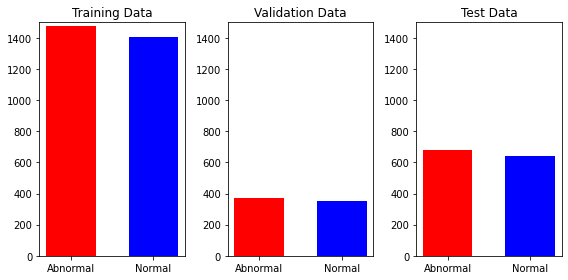

In [ ]:
# Class의 종류 확인: 정상 1, 비정상 -1
classes = np.unique(np.concatenate((y_train, y_test), axis=0))  # classes = array([-1,  1])

x = np.arange(len(classes))  # Plot의 X축의 개수 구하기
labels = ["Abnormal", "Normal"]   # Plot의 X축의 이름 구하기

values_train = [(y_train == i).sum() for i in classes]  # Train 데이터의 정상/비정상 각 총 개수
values_valid = [(y_valid == i).sum() for i in classes]  # Test 데이터의 정상/비정상 각 총 개수
values_test = [(y_test == i).sum() for i in classes]  # Test 데이터의 정상/비정상 각 총 개수

plt.figure(figsize=(8,4))  # Plot 틀(Figure)의 Size 설정 (5X3)

plt.subplot(1,3,1)   # Plot 틀(Figure) 내 3개의 subplot 중 첫 번째(왼쪽) 지정
plt.title("Training Data")  # subplot 제목
plt.bar(x, values_train, width=0.6, color=["red", "blue"])  # Train 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 1500])
plt.xticks(x, labels)  # X축에 변수 기입

plt.subplot(1,3,2)  # Plot 틀(Figure) 내 3개의 subplot 중 두 번째(가운데) 지정
plt.title("Validation Data")
plt.bar(x, values_valid, width=0.6, color=["red", "blue"])  # Test 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 1500])
plt.xticks(x, labels)  

plt.subplot(1,3,3)  # Plot 틀(Figure) 내 3개의 subplot 중 세 번째(오른쪽) 지정
plt.title("Test Data")
plt.bar(x, values_test, width=0.6, color=["red", "blue"])  # Test 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 1500])
plt.xticks(x, labels)

plt.tight_layout()  # 그림 저장
plt.savefig(data_path + 'data_imbalance.png', dpi=100, bbox_inches='tight')  # 그림 저장
plt.show()  # 그림 출력

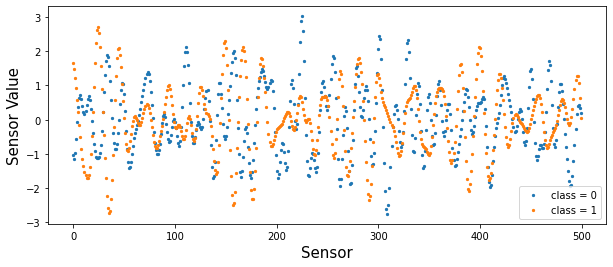

In [ ]:
import random

labels = np.unique(np.concatenate((y_train, y_test), axis=0))  # labels (-1 or 1)

plt.figure(figsize = (10, 4))
for c in labels:
    c_x_train = x_train[y_train == c]
    if c == -1: c = c + 1  # 편의 상 Abnormal Class(-1)를 0으로 조정
    time_t = random.randint(0, c_x_train.shape[0]) # 0~1404 사이의 랜덤한 정수가 특정 time t가 됨
    plt.scatter(range(0, 500), c_x_train[time_t], label="class = " + str(int(c)), marker='o', s=5)
    
plt.legend(loc="lower right")
plt.xlabel("Sensor", fontsize=15)
plt.ylabel("Sensor Value", fontsize=15)
plt.savefig(data_path + 'ford_data_ts_sample1.png', dpi=100, bbox_inches='tight')
plt.show()
plt.close()

비정상 Label 데이터 수:  1476


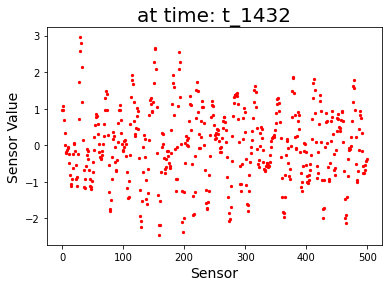

정상 Label 데이터 수:  1404


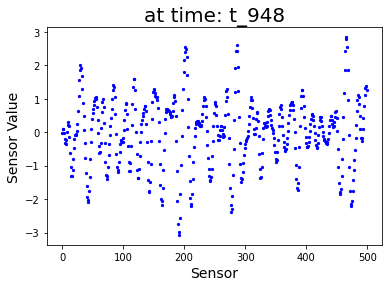

In [ ]:
def get_scatter_plot(c):
    time_t = random.randint(0, c_x_train.shape[0])  # 0~1404 사이의 랜덤한 정수가 특정 time t가 됨
    plt.scatter(range(0, c_x_train.shape[1]), c_x_train[time_t], 
                marker='o', s=5, c="r" if c == -1  else "b")
    plt.title("at time: t_{}".format(time_t), fontsize=20)
    plt.xlabel("Sensor", fontsize=14)
    plt.ylabel("Sensor Value", fontsize=14)
    plt.savefig(data_path + '{state}.png'.format(state="abnormal" if c == -1 else "normal"), 
                dpi=100, bbox_inches='tight')
    plt.show()
    plt.close()

labels = np.unique(np.concatenate((y_train, y_test), axis=0))

for c in labels:
    c_x_train = x_train[y_train == c]
    if c == -1:
        print("비정상 Label 데이터 수: ", len(c_x_train))
        get_scatter_plot(c)
    else:
        print("정상 Label 데이터 수: ", len(c_x_train))
        get_scatter_plot(c)

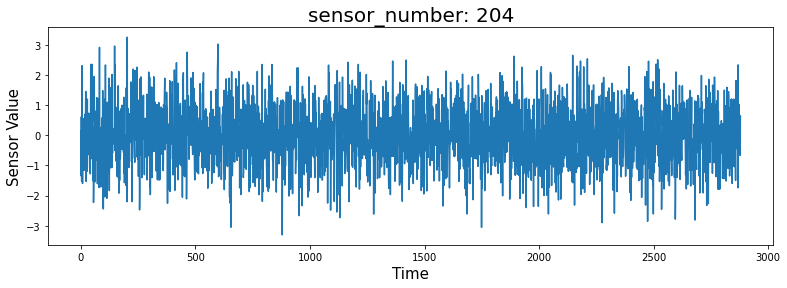

In [ ]:
sensor_number = random.randint(0, 500)  # 0~500 사이의 랜덤한 정수가 Sensor 번호가 됨

plt.figure(figsize = (13, 4))
plt.title("sensor_number: {}".format(sensor_number), fontsize=20)
plt.plot(x_train[:, sensor_number])
plt.xlabel("Time", fontsize=15)
plt.ylabel("Sensor Value", fontsize=15)
plt.savefig(data_path + 'ford_a_sensor.png', dpi=100, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
import matplotlib.cm as cm
from matplotlib.collections import EllipseCollection

df = pd.DataFrame(data = x_train, 
                  columns= ["sensor_{}".format(label+1) for label in range(x_train.shape[1])])

data = df.corr()

def plot_corr_ellipses(data, ax =None, **kwargs):

    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)
    return ec


fig, ax = plt.subplots(1, 1, figsize=(20, 20))
cmap = cm.get_cmap('jet', 31)
m = plot_corr_ellipses(data, ax=ax, cmap=cmap)
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')
# ax.margins(0.1)

plt.title('Correlation between Feature')
# labels = label
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.tight_layout()
plt.savefig(data_path + 'corr.png', dpi=100, bbox_inches='tight')  # 그림 저장

#plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Standard Scaler를 적용
stder = StandardScaler() 
stder.fit(x_train)
x_train = stder.transform(x_train)
x_valid = stder.transform(x_valid)

# Robust Scaler를 적용
#rscaler = RobustScaler() 
#rscaler.fit(x_train)
#x_train = rscaler.transform(x_train)
#x_valid = rscaler.transform(x_valid)

In [ ]:
# CNN, RNN 모델의 입력 변수는 채널 축 1개 차원을 확장시킨 3D Tensor이다.
# 즉 아래 CNN, RNN 모델은 x_train, x_valid, x_test를 입력 변수로 넣지 않고, 
# x_train_exp, x_valid_exp, x_test_exp을 넣는다. 
x_train_exp = np.expand_dims(x_train, -1)  # 채널 축 1개 차원을 확장 시킨(Expand) X_train
x_valid_exp = np.expand_dims(x_valid, -1)  # 채널 축 1개 차원을 확장 시킨(Expand) X_vaild 
x_test_exp = np.expand_dims(x_test, -1)  # 채널 축 1개 차원을 확장 시킨(Expand) X_test

# 위와 동일한 코드
# x_train_exp = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
# x_valid_exp = x_train.reshape((x_valid.shape[0], x_valid.shape[1], 1))
# x_test_exp = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

print("x_train_exp의 형태:", x_train_exp.shape)
print("x_valid_exp의 형태:", x_valid_exp.shape)
print("x_test_exp의 형태:", x_test_exp.shape)

x_train_exp의 형태: (2880, 500, 1)
x_valid_exp의 형태: (721, 500, 1)
x_test_exp의 형태: (1320, 500, 1)


In [ ]:
y_train[y_train == -1] = 0
y_valid[y_valid == -1] = 0
y_test[y_test == -1] = 0

In [ ]:
num_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))
num_classes

2

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_lr_1 = LogisticRegression()   # 디폴트값 사용
"""clf_lr_1 = LogisticRegression(penalty='l2',  # 패널티 부여 기준
                         tol=0.0001,         
                         C=1, 
                         fit_intercept=True, 
                         intercept_scaling=1, 
                         random_state=2,       # 랜덤 번호 시드
                         solver='lbfgs',       # 최적화에 사용할 알고리즘 (이외에도 sag, saga, liblinear, newton-cg가 있다.)
                         max_iter=1000,        # solver가 수렴하게 만드는 최대 반복 횟수
                         multi_class='auto',
                         verbose=0)"""

"clf_lr_1 = LogisticRegression(penalty='l2',  # 패널티 부여 기준\n                         tol=0.0001,         \n                         C=1, \n                         fit_intercept=True, \n                         intercept_scaling=1, \n                         random_state=2,       # 랜덤 번호 시드\n                         solver='lbfgs',       # 최적화에 사용할 알고리즘 (이외에도 sag, saga, liblinear, newton-cg가 있다.)\n                         max_iter=1000,        # solver가 수렴하게 만드는 최대 반복 횟수\n                         multi_class='auto',\n                         verbose=0)"

In [ ]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=1000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.eps = 1e-10
        self.threshold = 0.5
        self.loss_history = list()
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    def __loss(self, h, y):
        return (-y * np.log(h+ self.eps) - (1 - y) * np.log(1 - h + self.eps)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            logit = np.dot(X, self.theta)
            hypothesis = self.__sigmoid(logit)
            gradient = np.dot(X.T, (hypothesis - y)) / y.size
            self.theta -= self.lr * gradient
            
            if self.verbose == True and i % 10 == 0:
                loss = self.__loss(hypothesis, y)
                print(f'epoch: {i} \t loss: {loss} \t')
                self.loss_history.append(loss)
        return self.loss_history
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        predicted_labels = np.where(self.predict_prob(X) > self.threshold, 1, 0)
        return predicted_labels

    def eval(self, x, y):
        res_y = np.round(self.predict_prob(x), 0)
        accuracy = np.sum(res_y==y) / len(y)

        return accuracy

In [ ]:
x_train_lr = np.concatenate((x_train, x_valid), axis=0)  # 로지스틱 회귀 학습용 데이터
y_train_lr = np.concatenate((y_train, y_valid), axis=0)  # 로지스틱 회귀 테스트용 데이터

In [ ]:
clf_lr_1.fit(x_train_lr, y_train_lr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# make and fit model

clf_lr_2 = LogisticRegression(lr=0.01, num_iter=1000, verbose=True)
history_lr = clf_lr_2.fit(x_train_lr, y_train_lr)

epoch: 0 	 loss: 0.6931471803599453 	
epoch: 10 	 loss: 0.6904899637675816 	
epoch: 20 	 loss: 0.6889239094938908 	
epoch: 30 	 loss: 0.6877765367187595 	
epoch: 40 	 loss: 0.6868688414532079 	
epoch: 50 	 loss: 0.6861264028512316 	
epoch: 60 	 loss: 0.685506647126465 	
epoch: 70 	 loss: 0.6849811804514382 	
epoch: 80 	 loss: 0.6845297410991716 	
epoch: 90 	 loss: 0.6841373605861225 	
epoch: 100 	 loss: 0.6837927364357145 	
epoch: 110 	 loss: 0.6834871959245933 	
epoch: 120 	 loss: 0.683213997239752 	
epoch: 130 	 loss: 0.682967841058459 	
epoch: 140 	 loss: 0.6827445205184289 	
epoch: 150 	 loss: 0.6825406655388402 	
epoch: 160 	 loss: 0.6823535532062365 	
epoch: 170 	 loss: 0.6821809653950383 	
epoch: 180 	 loss: 0.6820210807339536 	
epoch: 190 	 loss: 0.6818723918967042 	
epoch: 200 	 loss: 0.6817336417848234 	
epoch: 210 	 loss: 0.6816037739451478 	
epoch: 220 	 loss: 0.6814818938053722 	
epoch: 230 	 loss: 0.6813672381930465 	
epoch: 240 	 loss: 0.681259151239424 	
epoch: 250 	 lo

In [ ]:
y_pred = clf_lr_1.predict(x_test)
y_pred_proba = clf_lr_1.predict_proba(x_test)

In [ ]:
score = clf_lr_1.score(x_test, y_test)
print("%s: %.2f%%" % ("Logistic Regression Prediction Rate", score*100)) # Scikit learn 모델

Logistic Regression Prediction Rate: 49.24%


In [ ]:
score = clf_lr_2.eval(x_test, y_test)
print("%s: %.2f%%" % ("Logistic Regression Prediction Rate", score*100))  # numpy로 구현한 모델

Logistic Regression Prediction Rate: 49.17%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def draw_confusion_matrix(model, xt, yt, model_name):
    Y_pred = model.predict(xt)
    if model_name in ["cnn", "rnn"]:
        y_pred = np.argmax(Y_pred, axis=1)
    else: y_pred = Y_pred
    plt.figure(figsize=(3,3))
    cm = confusion_matrix(yt, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['abnormal', 'normal'], rotation=45)
    plt.yticks(tick_marks, ['abnormal', 'normal'])
    thresh = cm.max()/1.2
    normalize = False
    fmt = '.2f' if normalize else 'd'
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt), 
                 horizontalalignment="center", 
                 color="white" if cm[i,j] > thresh else "black", 
                 fontsize=12)
    plt.ylabel("Actual Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.savefig(data_path + '{}_cm.png'.format(model_name), dpi=100, bbox_inches='tight')  # 그림 저장
    plt.show()
    print(classification_report(yt, y_pred))

In [ ]:
from sklearn.metrics import roc_curve, auc

def draw_roc(model,xt, yt, model_name):
    Y_pred = model.predict(xt)
    if model_name in ["cnn", "rnn"]:
        y_pred = np.argmax(Y_pred, axis=1)
    else: y_pred = Y_pred
    fpr, tpr, thr = roc_curve(yt, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic {};'.format(model_name))
    plt.legend(loc="lower right")
    plt.ion()
    plt.tight_layout()
    plt.savefig(data_path + '{}_roc.png'.format(model_name), dpi=100, bbox_inches='tight')  # 그림 저장
    plt.show()

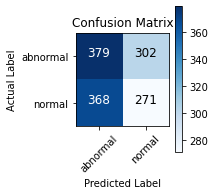

              precision    recall  f1-score   support

         0.0       0.51      0.56      0.53       681
         1.0       0.47      0.42      0.45       639

    accuracy                           0.49      1320
   macro avg       0.49      0.49      0.49      1320
weighted avg       0.49      0.49      0.49      1320



In [ ]:
draw_confusion_matrix(clf_lr_1, x_test, y_test, "logistic_regression_sklearn")

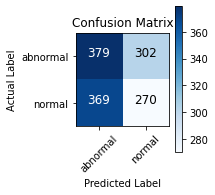

              precision    recall  f1-score   support

         0.0       0.51      0.56      0.53       681
         1.0       0.47      0.42      0.45       639

    accuracy                           0.49      1320
   macro avg       0.49      0.49      0.49      1320
weighted avg       0.49      0.49      0.49      1320



In [ ]:
draw_confusion_matrix(clf_lr_2, x_test, y_test, "logistic_regression_numpy")

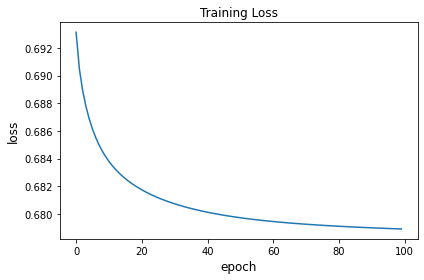

In [ ]:
plt.figure()
plt.plot(history_lr)
plt.title("Training Loss")
plt.ylabel("loss", fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.tight_layout()
plt.savefig(data_path + 'lr_learning_curve.png', dpi=100, bbox_inches='tight')  # 그림 저장
plt.show()
plt.close()

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

"""
# 반드시 튜닝해야할 파라미터는  min_child_weight / max_depth / gamma
"""

xgb = XGBClassifier(
    learning_rate=0.1, 
    n_estimators=500, 
    max_depth=5,
    min_child_weight=3, 
    gamma=0.2, 
    subsample=0.6, 
    colsample_bytree=1.0,
    objective='binary:logistic', 
    nthread=4, 
    scale_pos_weight=1, 
    seed=27)

In [ ]:
from sklearn.model_selection import GridSearchCV

# grid search를 하고 싶을 경우 아래 Code를 주석 해제

#parameters = {
 #   "learning_rate" : [0.1, 0.01, 0.001, 0.0001],
   # "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
  #  "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
  #    "min_child_weight" : [ 1, 3, 5, 7 ],
  #    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4],
  #    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
  #    }

#grid = GridSearchCV(xgb,
#                   parameters, n_jobs=4,
#                    scoring="neg_log_loss",
#                    cv=5)
#grid.fit(
 #   x_train.squeeze(), 
 #   y_train, 
 #   eval_metric="auc", 
 #   eval_set=[(x_train, y_train), (x_valid, y_valid)], 
 #   verbose=True)

xgb.fit(
    x_train,
    y_train, 
    eval_metric=["auc","error"], 
    eval_set=[(x_train, y_train), (x_valid, y_valid)], 
    verbose=True)

print()

[0]	validation_0-auc:0.683769	validation_0-error:0.352083	validation_1-auc:0.556568	validation_1-error:0.445215
[1]	validation_0-auc:0.730083	validation_0-error:0.33125	validation_1-auc:0.60576	validation_1-error:0.417476
[2]	validation_0-auc:0.756296	validation_0-error:0.315625	validation_1-auc:0.609841	validation_1-error:0.417476
[3]	validation_0-auc:0.799655	validation_0-error:0.276042	validation_1-auc:0.617937	validation_1-error:0.40638
[4]	validation_0-auc:0.818645	validation_0-error:0.261806	validation_1-auc:0.644995	validation_1-error:0.382802
[5]	validation_0-auc:0.833596	validation_0-error:0.249306	validation_1-auc:0.6458	validation_1-error:0.385576
[6]	validation_0-auc:0.85182	validation_0-error:0.239236	validation_1-auc:0.662909	validation_1-error:0.395284
[7]	validation_0-auc:0.863193	validation_0-error:0.223958	validation_1-auc:0.666359	validation_1-error:0.378641
[8]	validation_0-auc:0.886401	validation_0-error:0.197917	validation_1-auc:0.683999	validation_1-error:0.37725

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

y_pred = xgb.predict(x_test)
y_pred_proba = xgb.predict_proba(x_test)[:, 1]


print("Accuracy : %f" % accuracy_score(y_test, y_pred))
print("AUC Score (training set): %f" % roc_auc_score(y_test, y_pred_proba))
print("F1 Score (training set): %f" % f1_score(y_test, y_pred))

In [ ]:
draw_confusion_matrix(xgb, x_test, y_test, "xgboost")

In [ ]:
draw_roc(clf_lr_1, x_test, y_test, "logistic_regression")

In [ ]:
draw_roc(clf_lr_2, x_test, y_test, "logistic_regression_numpy") 

In [ ]:
draw_roc(xgb, x_test, y_test, "xgboost")

In [ ]:
xgb_results = xgb.evals_result()  # xgboost 모델의 평가 결과 불러오기
epochs = len(xgb_results['validation_0']['error'])    # iteration 수
x_axis = range(0, epochs)  # x축(epoch) 범위 설정


# plot classification error
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x_axis, xgb_results['validation_0']['error'], label='Train')
ax.plot(x_axis, xgb_results['validation_1']['error'], label='Validation')
ax.legend()

plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.tight_layout()
plt.show()


# plot auc
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x_axis, xgb_results['validation_0']['auc'], label='Train')
ax.plot(x_axis, xgb_results['validation_1']['auc'], label='Validation')
ax.legend()

plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

feat_imp = xgb.feature_importances_
idx = np.where(feat_imp > 0.004)
feat_imp_important = feat_imp[idx]
feat = ["sensor_{}".format(i+1) for i in idx[0]]

res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp_important}).sort_values(by='Importance', ascending=False)
res_df.plot('Features', 'Importance', kind='bar', title='Feature Importances', figsize = (7, 5) )
plt.ylabel('Feature Importance Score')
plt.tight_layout()
plt.show()
print(res_df)
print(res_df["Features"].tolist())

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Flatten, Dense, Embedding, Dropout

def make_rnn_model():
    model = Sequential()
    model.add(LSTM(units=256,return_sequences=True))  
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax'))
    return model
 
rnn_model = make_rnn_model()

In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

epochs= 100
batch_size = 64

rnn_model.compile(loss="sparse_categorical_crossentropy", 
                  optimizer='adam', 
                  metrics=["sparse_categorical_accuracy"]
                 )

callbacks = [ModelCheckpoint(data_path + 'rnn_best_model.h5', 
                             monitor='val_loss',
                             save_best_only=True),
             ReduceLROnPlateau(
                 monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
                 ),
             EarlyStopping(monitor="val_loss", patience=10, verbose=1)
             ]

history_rnn = rnn_model.fit(
    x_train_exp,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_valid_exp, y_valid),
    verbose=1
)

Epoch 1/100
45/45 [==============================] - 115s 2s/step - loss: 0.7146 - sparse_categorical_accuracy: 0.6181 - val_loss: 0.6017 - val_sparse_categorical_accuracy: 0.6588 - lr: 0.0010
Epoch 2/100
45/45 [==============================] - 116s 3s/step - loss: 0.5738 - sparse_categorical_accuracy: 0.6951 - val_loss: 0.5892 - val_sparse_categorical_accuracy: 0.6893 - lr: 0.0010
Epoch 3/100
45/45 [==============================] - 118s 3s/step - loss: 0.5474 - sparse_categorical_accuracy: 0.7309 - val_loss: 0.5892 - val_sparse_categorical_accuracy: 0.6782 - lr: 0.0010
Epoch 4/100
45/45 [==============================] - 114s 3s/step - loss: 0.5145 - sparse_categorical_accuracy: 0.7573 - val_loss: 0.5795 - val_sparse_categorical_accuracy: 0.6796 - lr: 0.0010
Epoch 5/100
45/45 [==============================] - 115s 3s/step - loss: 0.4703 - sparse_categorical_accuracy: 0.7767 - val_loss: 0.5917 - val_sparse_categorical_accuracy: 0.6976 - lr: 0.0010
Epoch 6/100
45/45 [================

In [ ]:
from tensorflow.keras.models import load_model

rnn_model = tf.keras.models.load_model(data_path + "rnn_best_model.h5")
scores = rnn_model.evaluate(x_test_exp, y_test)

print("\n""Test accuracy", scores[1])
print("\n""Test loss", scores[0])


42/42 [==============================] - 20s 475ms/step - loss: 0.4436 - sparse_categorical_accuracy: 0.8470

Test accuracy 0.846969723701477

Test loss 0.44357526302337646


In [ ]:
draw_confusion_matrix(rnn_model, x_test_exp, y_test, "rnn")

In [ ]:
draw_roc(rnn_model, x_test_exp, y_test, "rnn")

In [ ]:
def plot_loss_graph(history, pic_name):
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history["val_loss"])
    plt.title("Training & Validation Loss")
    plt.ylabel("loss", fontsize="large")
    plt.xlabel("epoch", fontsize="large")
    plt.legend(["train", "validation"], loc="best")
    plt.tight_layout()
    plt.savefig(data_path + '{}.png'.format(pic_name), dpi=100, bbox_inches='tight')  # 그림 저장
    plt.show()
    plt.close()

In [ ]:
def plot_prediction_graph(history, pic_name):
    plt.figure()
    plt.plot(history.history["sparse_categorical_accuracy"])
    plt.plot(history.history["val_" + "sparse_categorical_accuracy"])
    plt.title("model " + "Prediction Accuracy")
    plt.ylabel("sparse_categorical_accuracy", fontsize="large")
    plt.xlabel("epoch", fontsize="large")
    plt.legend(["train", "validation"], loc="best")
    plt.tight_layout()
    plt.savefig(data_path + '{}.png'.format(pic_name), dpi=100, bbox_inches='tight')  # 그림 저장
    plt.show()
    plt.close()

In [ ]:
plot_loss_graph(history_rnn, "rnn")

In [ ]:
plot_prediction_graph(history_rnn, "rnn")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv1D, ReLU, GlobalAveragePooling1D, Dense

def make_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv1D(filters=64, kernel_size=3, padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv1D(filters=64, kernel_size=3,padding="same"))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(GlobalAveragePooling1D())
    model.add(Dense(2, activation="softmax"))
    return model

cnn_model = make_cnn_model()

In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

epochs = 300
batch_size = 64

callbacks = [
    ModelCheckpoint(
        save_path + "cnn_best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

history_cnn = cnn_model.fit(
    x_train_exp,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_valid_exp, y_valid),
    verbose=1,
)